In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 23 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/Datasets/PlantVillage(1)/train'
valid_path = '/content/drive/MyDrive/Datasets/PlantVillage(1)/val'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.output

58900480/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function=preprocess_input)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 30591 images belonging to 2 classes.


In [ ]:
valid_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 9759 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=25)

Epoch 1/25
956/956 [==============================] - 5819s 6s/step - loss: 0.1816 - acc: 0.9340 - true_positives: 8857.0000 - true_negatives: 19715.0000 - false_positives: 764.0000 - false_negatives: 1255.0000 - precision: 0.9206 - recall: 0.8759 - val_loss: 0.1184 - val_acc: 0.9581 - val_true_positives: 2764.0000 - val_true_negatives: 6586.0000 - val_false_positives: 157.0000 - val_false_negatives: 252.0000 - val_precision: 0.9463 - val_recall: 0.9164
Epoch 2/25
956/956 [==============================] - 170s 178ms/step - loss: 0.0969 - acc: 0.9679 - true_positives: 9626.0000 - true_negatives: 19983.0000 - false_positives: 496.0000 - false_negatives: 486.0000 - precision: 0.9510 - recall: 0.9519 - val_loss: 0.0906 - val_acc: 0.9685 - val_true_positives: 2815.0000 - val_true_negatives: 6637.0000 - val_false_positives: 106.0000 - val_false_negatives: 201.0000 - val_precision: 0.9637 - val_recall: 0.9334
Epoch 3/25
956/956 [==============================] - 170s 178ms/step - loss: 0.074

In [ ]:
from tensorflow.keras.models import load_model
model.save('vgg16retrain2.h5')

In [ ]:
from tensorflow.keras.models import load_model
!pip install pyyaml h5py 
model.save('/content/drive/MyDrive/Weights','vgg16retrain_2.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Weights/assets


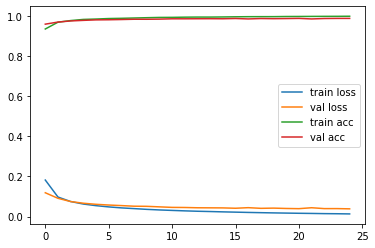

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/Datasets/PlantVillage(1)/test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode='binary')

Found 8448 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.09760976582765579,
 0.9636600613594055,
 1889.0,
 6252.0,
 240.0,
 67.0,
 0.8872710466384888,
 0.9657464027404785]